In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Load CSV file
df = pd.read_csv("salesmonthly.csv")

# Show first few rows
df.head()


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [5]:
df['datum'] = pd.to_datetime(df['datum'])  # Convert 'datum' to datetime
df.set_index('datum', inplace=True)       # Set date column as index
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2014-01-31 to 2019-10-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M01AB   70 non-null     float64
 1   M01AE   70 non-null     float64
 2   N02BA   70 non-null     float64
 3   N02BE   70 non-null     float64
 4   N05B    70 non-null     float64
 5   N05C    70 non-null     float64
 6   R03     70 non-null     float64
 7   R06     70 non-null     float64
dtypes: float64(8)
memory usage: 4.9 KB


In [6]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


<Figure size 1400x600 with 0 Axes>

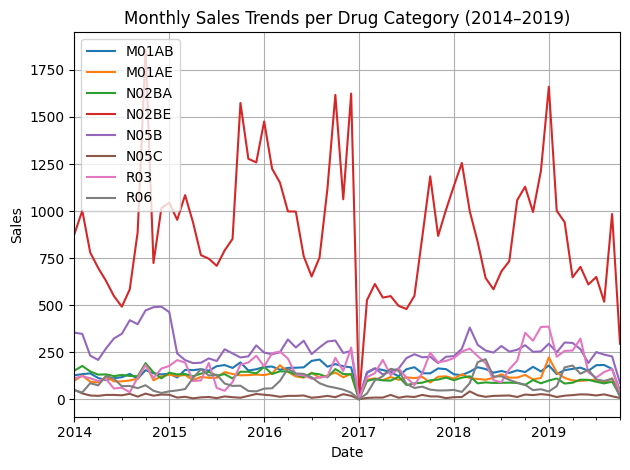

In [7]:
plt.figure(figsize=(14, 6))
df.plot(title="Monthly Sales Trends per Drug Category (2014–2019)", grid=True)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [10]:
!pip install fbprophet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 29.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 7.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [69 lines of output]
      /tmp/pip-install-ebuaffnw/fbprophet_9cf796b2228d40999a33adf54ffea10e/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      /tmp/pip-install-ebuaffnw/fbprophet_9cf796b2228d40999a33adf54ffea10e/setup.py:19: SetuptoolsDeprecationWarning: The test command is disabled

In [15]:
%pip install Prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 27.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from prophet import Prophet

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [17]:
# Prepare the DataFrame
df_prophet = df[['N02BE']].reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet.head()

,ds,y
0,2014-01-31,878.030
1,2014-02-28,1001.900
2,2014-03-31,779.275
3,2014-04-30,698.500
4,2014-05-31,628.780


In [18]:
model = Prophet()
model.fit(df_prophet)

21:14:56 - cmdstanpy - INFO - Chain [1] start processing
21:14:56 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
77,2020-06-30
78,2020-07-31
79,2020-08-31
80,2020-09-30
81,2020-10-31


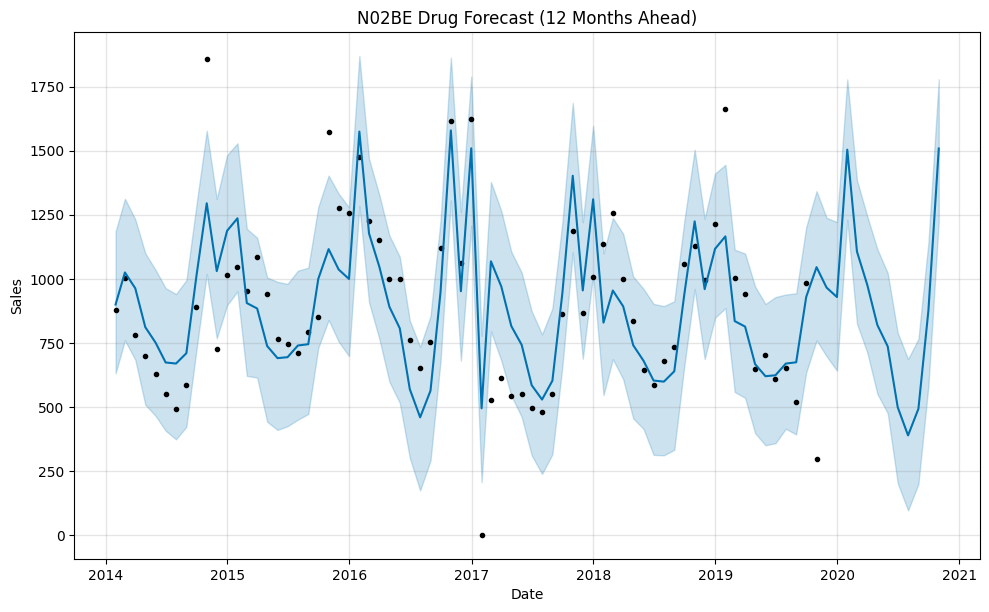

In [20]:
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("N02BE Drug Forecast (12 Months Ahead)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

In [21]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
70,2019-11-30,965.176328,697.175925,1237.757780
71,2019-12-31,928.253212,640.973679,1220.949681
72,2020-01-31,1503.703892,1230.018383,1778.008088
73,2020-02-29,1105.734168,824.289682,1384.039551
74,2020-03-31,975.298318,711.020795,1243.025285
75,2020-04-30,819.340704,550.443983,1115.529761
76,2020-05-31,735.719738,474.977402,1021.842692
77,2020-06-30,498.095392,201.614163,788.785836
78,2020-07-31,388.012886,95.003217,686.007931
79,2020-08-31,491.900358,198.319516,764.826188


21:19:20 - cmdstanpy - INFO - Chain [1] start processing
21:19:20 - cmdstanpy - INFO - Chain [1] done processing


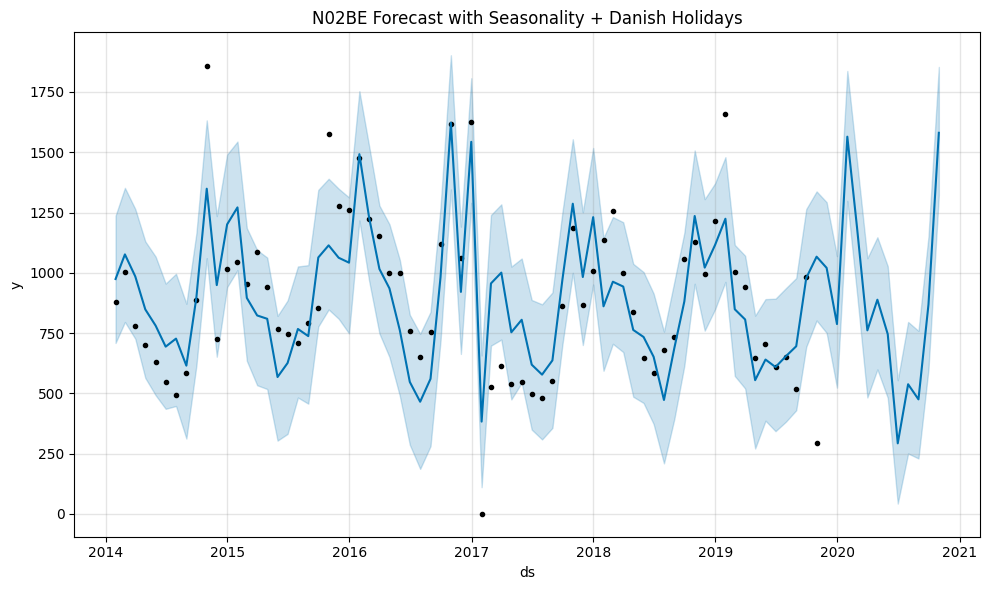

In [22]:
from prophet.make_holidays import make_holidays_df

# Add Danish holidays (DK available)
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model.add_country_holidays(country_name='DK')

# Refit the model
model.fit(df_prophet)

# Forecast again
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot updated forecast
model.plot(forecast)
plt.title("N02BE Forecast with Seasonality + Danish Holidays")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 108.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


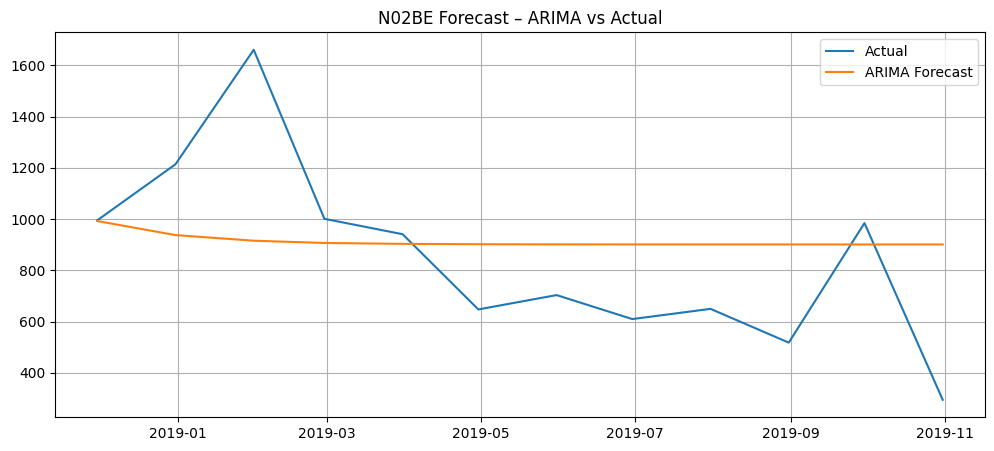

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Reuse df with datetime index and 'N02BE' column
ts = df['N02BE']

# Train/test split
train_arima = ts[:-12]
test_arima = ts[-12:]

# Fit ARIMA model (manual order or auto_arima later)
model_arima = ARIMA(train_arima, order=(1,1,1))
model_fit = model_arima.fit()

# Forecast
forecast_arima = model_fit.forecast(steps=12)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test_arima.index, test_arima, label="Actual")
plt.plot(test_arima.index, forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.title("N02BE Forecast – ARIMA vs Actual")
plt.grid(True)
plt.show()

In [26]:
import joblib
joblib.dump(model, 'prophet_n02be_model.pkl')

['prophet_n02be_model.pkl']